In [2]:
import json

data = dict();

with open("digitalInclusionData.json","r",encoding ="utf-8") as f:
    d = f.read()
    data = json.loads(d)
    
tweets = list()
for info in data["data"]:
    d = json.loads(info)
    tweets.append(d["text"])
#print(tweets)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter


In [4]:
tweets_df = pd.DataFrame(tweets, index=None,columns=["Tweets"])
tweets_df.head()

,Tweets
0,Min of Foreign Affairs of Ghana highlights the...
1,Digital Financial Inclusion and Security: The ...
2,Digital Financial Inclusion and Security: The ...
3,Digital Financial Inclusion and Security: The ...
4,New @CarnegieEndow: Digital Financial Inclusio...


In [5]:
#removing #, @ and links 
# removing hashtags
def remove_hashtags(text):
    hashtag = re.compile("#")
    return hashtag.sub("", text)

#removing @ symbols
def remove_at(text):
    at = re.compile("@")
    return at.sub("", text)

# removing links
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)
def get_words(text):
    return (text)

tweets_df["Tweets"] = tweets_df["Tweets"].apply(remove_at)
tweets_df["Tweets"] = tweets_df["Tweets"].apply(remove_hashtags)
tweets_df["Tweets"] = tweets_df["Tweets"].apply(remove_URL)

tweets_df.head()

,Tweets
0,Min of Foreign Affairs of Ghana highlights the...
1,Digital Financial Inclusion and Security: The ...
2,Digital Financial Inclusion and Security: The ...
3,Digital Financial Inclusion and Security: The ...
4,New CarnegieEndow: Digital Financial Inclusion...


In [6]:
#removing stopwords

stop_words = set(stopwords.words('english'))

for i in range(tweets_df.shape[0]):
    # tokenizing words in each tweet
    words = word_tokenize(tweets_df["Tweets"][i])
    # joining the tokens to form a sentence
    tokens = [word for word in words if word not in stop_words]
    clean_tokens =" ".join([word for word in words if word.isalnum()])
    tweets_df["Tweets"][i] = clean_tokens
    
tweets_df

,Tweets
0,Min of Foreign Affairs of Ghana highlights the...
1,Digital Financial Inclusion and Security The R...
2,Digital Financial Inclusion and Security The R...
3,Digital Financial Inclusion and Security The R...
4,New CarnegieEndow Digital Financial Inclusion ...
...,...
94,RT GhanaPresidency Gov t injects 200m in rural...
95,RT Government injects 200m in rural telephony ...
96,RT GhanaPresidency Gov t injects 200m in rural...
97,Government injects 200m in rural telephony and...


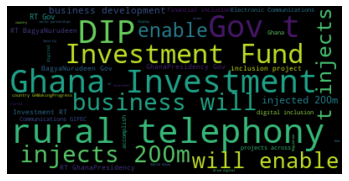

<Figure size 1152x576 with 0 Axes>

In [8]:
from wordcloud import WordCloud

def get_words(text):
    return (text)


words = " ".join(tweets_df["Tweets"].apply(get_words))
cloud = WordCloud(background_color="black").generate(words)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")

plt.figure(figsize=(16, 8))

plt.show()



In [9]:
from textblob import TextBlob

def check_sentiment_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def check_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity


tweets_df["Subjectivity Score"] = tweets_df["Tweets"].apply(check_sentiment_subjectivity)
tweets_df["Polarity Score"] = tweets_df["Tweets"].apply(check_sentiment_polarity)

tweets_df

,Tweets,Subjectivity Score,Polarity Score
0,Min of Foreign Affairs of Ghana highlights the...,0.108333,0.025000
1,Digital Financial Inclusion and Security The R...,0.000000,0.000000
2,Digital Financial Inclusion and Security The R...,0.000000,0.000000
3,Digital Financial Inclusion and Security The R...,0.000000,0.000000
4,New CarnegieEndow Digital Financial Inclusion ...,0.151515,0.045455
...,...,...,...
94,RT GhanaPresidency Gov t injects 200m in rural...,0.000000,0.000000
95,RT Government injects 200m in rural telephony ...,0.000000,0.000000
96,RT GhanaPresidency Gov t injects 200m in rural...,0.000000,0.000000
97,Government injects 200m in rural telephony and...,0.000000,0.000000


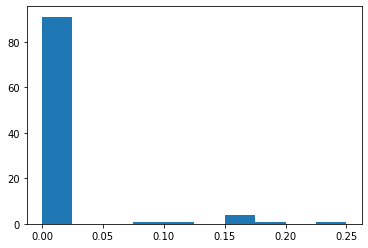

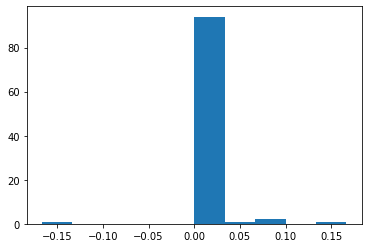

In [10]:
#ploting the sentiment scores
plt.hist(tweets_df["Subjectivity Score"])
plt.show()
plt.hist(tweets_df["Polarity Score"])
plt.show()